In [1]:
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
import numpy as np
from lsst.sims.almanac import Almanac
from lsst.sims.cloudModel import CloudModel
%matplotlib inline
import matplotlib.pylab as plt
from scipy.stats import binned_statistic
from astropy.time import Time

from datetime import datetime

In [2]:
class dummy_time_handler(object):
    """
    Don't need the full time handler, so save a dependency and use this.
    """
    def __init__(self, mjd_init):
        """
        Parameters
        ----------
        mjd_init : float
            The initial mjd
        """
        self._unix_start = datetime(1970, 1, 1)
        t = Time(mjd_init, format='mjd')
        self.initial_dt = t.datetime

    def time_since_given_datetime(self, datetime1, datetime2=None, reverse=False):
        """
        Really? We need a method to do one line of arithmatic?
        """
        if datetime2 is None:
            datetime2 = self._unix_start
        if reverse:
            return (datetime1 - datetime2).total_seconds()
        else:
            return (datetime2 - datetime1).total_seconds()


In [3]:
observatory = Model_observatory()

In [4]:
observatory.scheduledDowntime_model.downtimes
# night, number of nights down, reason

[(158, 7, 'general maintenance'),
 (307, 7, 'general maintenance'),
 (523, 7, 'general maintenance'),
 (672, 7, 'general maintenance'),
 (888, 14, 'recoat mirror'),
 (1253, 7, 'general maintenance'),
 (1402, 7, 'general maintenance'),
 (1618, 14, 'recoat mirror'),
 (1983, 7, 'general maintenance'),
 (2132, 7, 'general maintenance'),
 (2348, 14, 'recoat mirror'),
 (2713, 7, 'general maintenance'),
 (2862, 7, 'general maintenance'),
 (3078, 14, 'recoat mirror'),
 (3443, 7, 'general maintenance'),
 (3592, 7, 'general maintenance'),
 (3808, 14, 'recoat mirror'),
 (4173, 7, 'general maintenance'),
 (4322, 7, 'general maintenance'),
 (4538, 14, 'recoat mirror'),
 (4903, 7, 'general maintenance'),
 (5052, 7, 'general maintenance'),
 (5268, 14, 'recoat mirror'),
 (5633, 7, 'general maintenance'),
 (5782, 7, 'general maintenance'),
 (5998, 14, 'recoat mirror'),
 (6363, 7, 'general maintenance'),
 (6512, 7, 'general maintenance'),
 (6728, 14, 'recoat mirror'),
 (7093, 7, 'general maintenance'),


In [5]:
observatory.unscheduledDowntime_model.downtimes
# night, number of nights down, reason

[(48, 3, 'intermediate event'),
 (127, 1, 'minor event'),
 (230, 1, 'minor event'),
 (233, 1, 'minor event'),
 (299, 1, 'minor event'),
 (355, 1, 'minor event'),
 (386, 7, 'major event'),
 (397, 1, 'minor event'),
 (413, 1, 'minor event'),
 (507, 1, 'minor event'),
 (530, 1, 'minor event'),
 (552, 1, 'minor event'),
 (649, 1, 'minor event'),
 (748, 3, 'intermediate event'),
 (792, 3, 'intermediate event'),
 (872, 1, 'minor event'),
 (1051, 7, 'major event'),
 (1060, 1, 'minor event'),
 (1161, 1, 'minor event'),
 (1163, 3, 'intermediate event'),
 (1203, 1, 'minor event'),
 (1232, 1, 'minor event'),
 (1307, 3, 'intermediate event'),
 (1337, 1, 'minor event'),
 (1396, 1, 'minor event'),
 (1411, 3, 'intermediate event'),
 (1444, 1, 'minor event'),
 (1465, 3, 'intermediate event'),
 (1626, 1, 'minor event'),
 (1650, 1, 'minor event'),
 (1916, 7, 'major event'),
 (2046, 1, 'minor event'),
 (2218, 1, 'minor event'),
 (2262, 1, 'minor event'),
 (2383, 3, 'intermediate event'),
 (2396, 3, 'inte

In [6]:
observatory.down_nights

[48,
 49,
 50,
 127,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 230,
 233,
 299,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 355,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 397,
 413,
 507,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 552,
 649,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 748,
 749,
 750,
 792,
 793,
 794,
 872,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1060,
 1161,
 1163,
 1164,
 1165,
 1203,
 1232,
 1253,
 1254,
 1255,
 1256,
 1257,
 1258,
 1259,
 1307,
 1308,
 1309,
 1337,
 1396,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1411,
 1412,
 1413,
 1444,
 1465,
 1466,
 1467,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1650,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 2046,
 2132,
 2133,
 2134,
 2135,
 2136,
 2137,
 2138,
 2218,
 2262,
 2348,
 2349,
 2350,
 2

In [7]:
print('total number of down nights (not including weather)', np.size(observatory.down_nights))

total number of down nights (not including weather) 595


In [8]:
mjd_start=59853.5
almanac = Almanac(mjd_start=mjd_start)
dth = dummy_time_handler(mjd_start)
cloud_model = CloudModel(dth)
cloud_model.read_data()
        # XXX-argle bargle, really?!?!?
cloud_model.offset = 0

In [9]:
mjds = np.arange(mjd_start, mjd_start+365.25*10, 1/24/2.)

In [10]:
indx = almanac.mjd_indx(mjds)

In [11]:
sun_moon_info = almanac.get_sun_moon_positions(mjds)

In [12]:
good = np.where(sun_moon_info['sun_alt'] < np.radians(-18.))


In [13]:
delta_t = (mjds[good]-mjd_start)*24.*3600.
clouds = [cloud_model.get_cloud(x) for x in delta_t]

In [14]:
cloud_limit = 0.3
t_lost = mjds[good]*0
t_lost[np.where(np.array(clouds) >= cloud_limit)] = 0.5
t_open = t_lost*0
t_open[np.where(np.array(clouds) < cloud_limit)] = 0.5

In [15]:
np.sum(t_lost)/np.sum(t_open)

0.40297371036991603

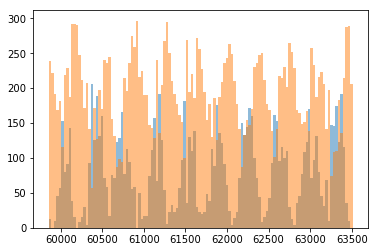

In [16]:
bins = np.arange(mjd_start, mjd_start+365.25*10+30, 30)
ack = plt.hist(mjds[good], weights=t_lost, bins=bins, alpha=0.5)
ack = plt.hist(mjds[good], weights=t_open, bins=bins, alpha=0.5)

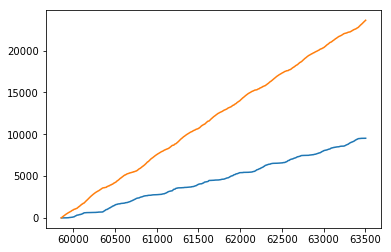

In [17]:
plt.plot(mjds[good], np.cumsum(t_lost))
plt.plot(mjds[good], np.cumsum(t_open))

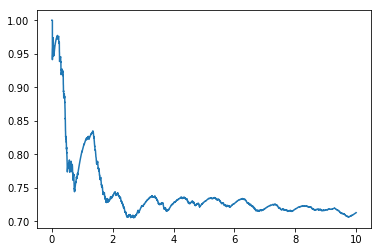

In [18]:
plt.plot((mjds[good]-mjd_start)/365.25, np.cumsum(t_open)/(np.cumsum(t_open)+np.cumsum(t_lost)))

In [19]:
lost, bins, bn = binned_statistic(mjds[good], t_lost, bins=bins, statistic='sum')
obs, bins, bn = binned_statistic(mjds[good], t_open, bins=bins, statistic='sum')

In [20]:
lost

array([  12. ,    0. ,   10. ,   45.5,   56.5,  152.5,   80. ,   91. ,
        143. ,   38. ,   15. ,    0. ,    9. ,   15.5,   29.5,    3.5,
         92.5,  206.5,  125. ,  188.5,  132. ,  160. ,   71. ,   58. ,
         17.5,   76. ,   72. ,  122.5,  128.5,  166. ,   77. ,  113.5,
         93.5,   55. ,   58. ,    0. ,   50.5,   12.5,   17.5,   17.5,
         74. ,  112. ,  156.5,   66.5,  192. ,  126. ,   54. ,    5. ,
         22.5,   32.5,   22. ,   28. ,   57. ,   97. ,  181. ,   35. ,
        130.5,  110. ,  139. ,   30. ,   23. ,   20. ,   23. ,   48. ,
         39. ,  112.5,   88. ,  175.5,  135.5,  121. ,   92. ,   61. ,
         23.5,    4.5,   13.5,   23. ,   71. ,  150. ,  133.5,  144. ,
        171. ,  159.5,   99.5,   71. ,   44. ,    8. ,   16. ,   23.5,
         42. ,   92.5,  161. ,  153. ,   95. ,  115.5,   99.5,  110.5,
         30. ,   12.5,    4. ,   35. ,   45.5,   77. ,  108. ,  122.5,
        170.5,   71.5,   97.5,  131. ,   80.5,   45. ,   31.5,   68. ,
      

In [21]:
obs

array([ 239. ,  222. ,  191. ,  168.5,  182. ,  116. ,  219. ,  229. ,
        187. ,  291.5,  291.5,  290. ,  247.5,  211.5,  171. ,  208. ,
        141. ,   57. ,  171.5,  126.5,  198. ,  170. ,  240. ,  235.5,
        244. ,  156. ,  131. ,   87.5,   98.5,   94.5,  214.5,  195.5,
        236.5,  275. ,  258.5,  296.5,  216.5,  224.5,  190. ,  190.5,
        147. ,  143.5,  129. ,  240. ,  135.5,  204. ,  268. ,  294. ,
        250. ,  209.5,  191. ,  177.5,  161.5,  151. ,   99.5,  269. ,
        194.5,  220. ,  186. ,  272. ,  256. ,  227. ,  195. ,  155. ,
        177. ,  130. ,  185.5,  126. ,  187. ,  209. ,  235.5,  243.5,
        262.5,  248.5,  210.5,  177. ,  142. ,   87.5,  133.5,  154.5,
        147. ,  170.5,  230.5,  236.5,  247.5,  250.5,  212. ,  177.5,
        168.5,  139. ,  101.5,  142. ,  218. ,  214.5,  230.5,  202. ,
        264.5,  251. ,  229. ,  169. ,  164.5,  148. ,  151.5,  167. ,
        138. ,  258. ,  232.5,  187. ,  216.5,  223.5,  206.5,  141. ,
      

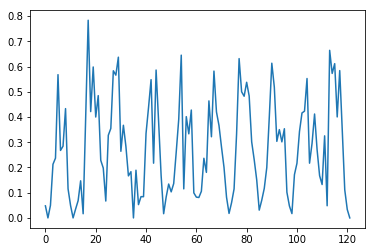

In [22]:
plt.plot(lost/(lost+obs))


In [23]:
np.sum(t_lost)/10.

952.64999999999998

In [24]:
# Just reading from Gemini
from_plot = 100+90+60+25+40+40+40+60+140+160+160
from_plot

915

In [25]:
np.unique(clouds)

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

In [26]:
for cloud_limit in [0.3, 0.49, 0.7]:

    t_lost = mjds[good]*0
    t_lost[np.where(np.array(clouds) >= cloud_limit)] = 0.5
    t_open = t_lost*0
    t_open[np.where(np.array(clouds) < cloud_limit)] = 0.5
    print(cloud_limit, np.sum(t_lost)/10.)

0.3 952.65
0.49 790.15
0.7 561.5


In [27]:
# stats from http://www.ctio.noao.edu/soar/content/soar-observing-statistics
soar_per = np.array([16.5, 21.6, 33.4, 27.7, 15.3])
print('mean weather loss percent from SOAR', soar_per.mean())

mean weather loss percent from SOAR 22.9
